# 文档结构

- IO
    - 数据文件读写（CSV）

- 全局函数
    - 一般都会在下面类中出现（快捷方式）
        - Series（一维数据）
        - DataFrame（二维数数据）：重点
        - Panel（三维数据）
----

- 重点包含三种数据结构
    - Series（一维列表数据集）
    - **DataFrame（二维数据数据表）**
        - 数据操作
    - Panel（三维数据集）
    
----

- 三种数据集的比较复杂的操作
    - Index
    - 标量
    - 窗口 / 分组(子数据集 /  按照字段分类)
    - 采样
    - 保存的数据格式Style
    - 图形（plot）


# pandas的编程模式

- 创建或者获取数据集（Series，DataFrame）
    - 使用DataFrame的构造器创建数据集
    - 从文件中读物数据集
    - 第三方的数据工具（第三方模型）
    
- 数据集的操作
    - 数据容器的基本操作（增加删除修改，遍历查找：行，列）
    - 数据操作（处理）
        - 运算符
        - 分组
        - 窗口
        - ....
    
- 数据可视化（选择比较直观的图形）
    

In [27]:
% matplotlib inline
import pandas as pd

# 数据集模式第一步：获取、创建数据集
alg = pd.read_csv('alg.csv')      # 通过pandas提供的函数读取数据集

alg[0:3]

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
0,跨越新科技,本科,互联网,未融资,北京 朝阳区 酒仙桥,算法工程师,10000人以上,25k-40k,发布于11:54,3-5年
1,水滴筹,本科,移动互联网,B轮,北京 朝阳区 望京,算法工程师,1000-9999人,25k-50k,发布于02月25日,3-5年
2,蚂蚁金服,本科,互联网,C轮,北京 朝阳区 呼家楼,算法工程师/专家,10000人以上,30k-60k,发布于14:36,经验不限


In [5]:
# 数据集模式第二步：数据操作（数据处理：属性 + 方法）： 数据分析
gp = alg.groupby('job_listed')   # 按照 job_listed 字段分组

ct = gp.count()   # 按照分组统计数数（缺失值也计算）
ct

,job_company,job_education,job_industry,job_location,job_name,job_persons,job_salary,job_time,job_year
job_listed,,,,,,,,,
A轮,49,49,49,49,49,49,49,49,49
B轮,31,31,31,31,31,31,31,31,31
C轮,33,33,33,33,33,33,33,33,33
D轮及以上,41,41,41,41,41,41,41,41,41
不需要融资,47,47,47,47,47,47,47,47,47
天使轮,14,14,14,14,14,14,14,14,14
已上市,51,51,51,51,51,51,51,51,51
未融资,19,19,19,19,19,19,19,19,19


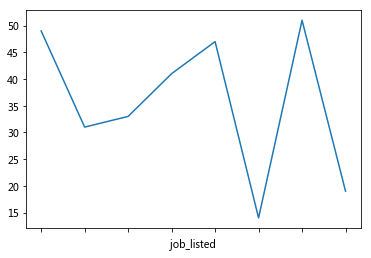

In [7]:
# 数据集模式第三步：数据可视化（matplotlib独立模块可视化 + pandas内置可视化[本质使用matplotlib模块]）
ct = ct['job_company']    # 只显示公司名
ct.plot()

- **注意**：
    - 重点讲解二维，能使用一维。

# 数据源

## 使用构造器创建

- 构造器说明

```python

    class pandas.DataFrame(
        data=None,     # 数据集的数据内容（二维）
        index=None,    # 行标签
        columns=None,    # 列的标签
        dtype=None,     # 数据类型（使用通用类型统一数据类型：通用编程 ）: numpy的数据类型一样
        copy=False)    # 克隆（两个独立控制）与引用（共享数据空间）：NumPy的ndarray + DataFrame

```

1. 理解data

In [9]:
import pandas

# df = pandas.DataFrame()  没有行，没有列

df = pandas.DataFrame(data = [
    [1, 2, 3, 4, 5],   # 行的数据
    [5, 6, 7, 8, 9]   
#列1,列2,列3,列4
])

# 这个数据采用默认的行标签与列标签（范围整数）
df

,0,1,2,3,4
0,1,2,3,4,5
1,5,6,7,8,9


In [10]:
import pandas

# df = pandas.DataFrame()  没有行，没有列

df = pandas.DataFrame(data = [1,2,3,4])

df

,0
0,1
1,2
2,3
3,4


2. index与columns列标签的使用

In [14]:
import pandas


df = pandas.DataFrame(    # ndarray = python  二维list等价 
    data = [
        [1, 2, 3, 4, 5],   
        [5, 6, 7, 8, 9] 
    ],
    index=['第一行','第二行'],
    columns= ['列1','列2','列3','列4','列5',]
)


df

,列1,列2,列3,列4,列5
第一行,1,2,3,4,5
第二行,5,6,7,8,9


3. data是字典的情况
    - 字典：映射：key：value：指定列名
    - 使用了字段，不建议使用columns

In [23]:
import pandas as pd
import numpy

df = pd.DataFrame(
    data = {
        '列1': [1,2,3,4],    # 对应列
        '列2':['jack', 'Rose', 'tom', 'Obama'] 
    },
    index=['A1','A2','A3','A4'],
    dtype = float
)

df


,列1,列2
A1,1.0,jack
A2,2.0,Rose
A3,3.0,tom
A4,4.0,Obama


- 创建数据集的方式两种：
    - data单纯的数据，使用index，columns指定行列标签
    - data中指定列名，使用index定制行标签
    
    
- 建议：
    - 没有特殊情况，行标签都使用整数范围标签索引

## 从文件读取数据

```python
 
    pandas.read_csv(    c（comma）s（separetes）v（values）
        filepath_or_buffer,    # 文件名，或者文件对象
        sep=', ',    # 列的分隔符，通常是逗号comma
        delimiter=None,   # 等同sep
        header='infer',    # 第一行当成列
        names=None,    # 指定列名
        index_col=None,   # 行标签
        usecols=None,    # 选择要读取的列
        na_values=None,  # NaN的替代值
        na_filter=True,  # 过滤居右NaN值的行
        keep_default_na=True, # 保存缺省的控制
                    
        squeeze=False,   # 压缩维数 
        prefix=None, 
        mangle_dupe_cols=True, 
        dtype=None, 
        engine=None, 
        converters=None, 
        true_values=None, 
        false_values=None, 
        skipinitialspace=False, 
        skiprows=None, nrows=None, 
        
        keep_default_na=True, 
      
        verbose=False, 
        skip_blank_lines=True, 
        parse_dates=False, 
        infer_datetime_format=False, 
        keep_date_col=False, 
        date_parser=None, 
        dayfirst=False, 
        iterator=False, 
        chunksize=None, 
        compression='infer', 
        thousands=None, 
        decimal=b'.', 
        lineterminator=None, 
        quotechar='"', 
        quoting=0, 
        escapechar=None, 
        comment=None, 
        encoding=None, 
        dialect=None, 
        tupleize_cols=None,
        error_bad_lines=True, 
        warn_bad_lines=True, 
        skipfooter=0, 
        doublequote=True, 
        delim_whitespace=False, 
        low_memory=True, 
        memory_map=False, float_precision=None
                
```

1. 文件名与分隔符

In [31]:
import pandas as pd


fd = open('python.csv','r')
data = pd.read_csv(fd, sep=',')

data =data[0:3]
fd.close()
data

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
0,旷视科技,本科,移动互联网,C轮,北京 海淀区 中关村,Python,1000-9999人,20k-30k,发布于昨天,3-5年
1,赤骥商贸有限公司,大专,贸易/进出口,未融资,北京 朝阳区 朝外,PYthon,100-499人,12k-24k,发布于昨天,5-10年
2,传智播客,学历不限,在线教育,已上市,北京 昌平区 回龙观,python讲师(J11808),1000-9999人,25k-35k,发布于02月20日,经验不限


2. header的使用
     - int or list of ints, default ‘infer’
         - int 指定哪一行作为列标签；而且数据就从改行开始

In [90]:
import  pandas as pd

data = pd.read_csv('python.csv', header = [0,1,2] )

data[0:3]

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
,旷视科技,本科,移动互联网,C轮,北京 海淀区 中关村,Python,1000-9999人,20k-30k,发布于昨天,3-5年
,赤骥商贸有限公司,大专,贸易/进出口,未融资,北京 朝阳区 朝外,PYthon,100-499人,12k-24k,发布于昨天,5-10年
0,传智播客,学历不限,在线教育,已上市,北京 昌平区 回龙观,python讲师(J11808),1000-9999人,25k-35k,发布于02月20日,经验不限
1,佰钧成技术,学历不限,计算机软件,不需要融资,北京 朝阳区 望京,Python,1000-9999人,12k-19k,发布于02月14日,1-3年
2,iHandy,本科,移动互联网,不需要融资,北京 海淀区 五道口,Python,100-499人,25k-50k,发布于02月16日,3-5年


3. names的使用

    - 列签名
         -指定names，所有行作为数据处理（使用header过滤列所在行）

In [45]:
import pandas as pd

data = pd.read_csv('java.csv', names= ['A','B','C','D','E','F','G','H','I','J'] ,header=0)

data[0:3]

,A,B,C,D,E,F,G,H,I,J
0,阿里巴巴集团,本科,互联网,已上市,北京 朝阳区 望京,Java,10000人以上,20k-40k,发布于02月18日,3-5年
1,达达-京东到家,本科,O2O,D轮及以上,北京 大兴区 亦庄,Java,1000-9999人,15k-30k,发布于14:43,5-10年
2,蚂蚁金服,本科,互联网,C轮,北京 朝阳区 朝外,Java,10000人以上,30k-50k,发布于02月18日,5-10年


4 . index_col的使用
     - 指定那一列作为索引：默认None，自定产生RangeIndex（0，len（data））
     

In [51]:
import pandas as pd

data = pd.read_csv('java.csv', index_col=[0,1])

data[0:3]

,,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
job_company,job_education,,,,,,,,
阿里巴巴集团,本科,互联网,已上市,北京 朝阳区 望京,Java,10000人以上,20k-40k,发布于02月18日,3-5年
达达-京东到家,本科,O2O,D轮及以上,北京 大兴区 亦庄,Java,1000-9999人,15k-30k,发布于14:43,5-10年
蚂蚁金服,本科,互联网,C轮,北京 朝阳区 朝外,Java,10000人以上,30k-50k,发布于02月18日,5-10年


5. usecols指定读取的列
    - 使用该参数过滤不需要的列

In [55]:
import pandas as pd

data = pd.read_csv('job.csv', usecols=['job_company','job_salary'],encoding='gbk')

data[0:3]

,job_company,job_salary
0,跨越新科技,25k-40k
1,水滴筹,25k-50k
2,蚂蚁金服,30k-60k


## 第三方模块

- 金融数据【股票，电影票房】

In [65]:
import tushare 

df = tushare.day_boxoffice('2019-05-01')

df[0:10]


,AvgPrice,AvpPeoPle,BoxOffice,BoxOffice_Up,IRank,MovieDay,MovieName,SumBoxOffice,WomIndex
0,47,38,33757,-32,1,9,复仇者联盟4：终局之战,343893,
1,32,29,3196,16,2,4,何以为家,8798,
2,33,18,2343,-51,3,2,下一任：前任,7363,
3,31,12,494,-28,4,2,悟空奇遇记,1179,
4,34,21,467,57,5,14,神奇乐园历险记,3536,
5,37,12,342,-17,6,3,雪暴,1346,
6,35,24,175,42,7,30,调音师,31735,
7,36,17,157,21,8,29,反贪风暴4,78275,
8,37,13,77,-7,9,7,撞死了一只羊,878,
9,33,9,46,-31,10,3,动物出击,249,


In [63]:
import tushare as ts
df = ts.get_realtime_quotes('000005') 
df

,name,open,pre_close,price,high,low,bid,ask,volume,amount,...,a2_p,a3_v,a3_p,a4_v,a4_p,a5_v,a5_p,date,time,code
0,世纪星源,3.260,3.280,3.300,3.340,3.260,3.290,3.300,8028983,26577158.690,...,3.310,1390,3.320,1803,3.330,1404,3.340,2019-04-30,15:00:03,000005


In [66]:
import tushare as ts
df = ts.get_hist_data('000005') 
df[0:5]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-30,3.26,3.34,3.30,3.26,80289.83,0.02,0.61,3.454,3.630,3.769,123770.79,204032.76,207614.28
2019-04-29,3.51,3.51,3.28,3.26,128376.40,-0.22,-6.29,3.528,3.683,3.803,130936.48,210083.39,239450.37
2019-04-26,3.49,3.62,3.50,3.40,152382.98,0.01,0.29,3.620,3.736,3.828,158956.58,209190.56,245803.70
2019-04-25,3.70,3.71,3.49,3.47,172276.80,-0.21,-5.68,3.694,3.770,3.837,216669.04,204248.14,250604.45
2019-04-24,3.68,3.72,3.70,3.64,85527.95,0.03,0.82,3.784,3.804,3.854,265944.42,200773.34,258046.82


# 数据处理

- 前提条件：准备好数据

In [68]:
import pandas as pd
import tushare as ts
stock = ts.get_hist_data('000005') 
job = pd.read_csv('python.csv', usecols=[0, 3, 4, 7])

In [69]:
stock[0:3]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-30,3.26,3.34,3.30,3.26,80289.83,0.02,0.61,3.454,3.630,3.769,123770.79,204032.76,207614.28
2019-04-29,3.51,3.51,3.28,3.26,128376.40,-0.22,-6.29,3.528,3.683,3.803,130936.48,210083.39,239450.37
2019-04-26,3.49,3.62,3.50,3.40,152382.98,0.01,0.29,3.620,3.736,3.828,158956.58,209190.56,245803.70


In [70]:
job[0:3]

,job_company,job_listed,job_location,job_salary
0,旷视科技,C轮,北京 海淀区 中关村,20k-30k
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k


In [71]:
import tushare as ts

all_company = ts.get_stock_basics()
all_company.shape

(3621, 22)

In [73]:
all_company[0:4]

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
600336,澳柯玛,家用电器,山东,25.95,7.32,7.99,609099.56,400569.81,57065.11,116664.07,...,2.35,2.03,20001229,-11215.88,-0.14,16.33,21.63,21.33,2.45,35072.0
000720,新能泰山,火力发电,山东,4.88,8.63,12.90,479977.09,426150.56,7271.87,68570.96,...,1.97,2.88,19970509,43458.90,0.34,214.10,-35.53,43.73,28.67,68804.0
002437,誉衡药业,化学制药,黑龙江,29.44,21.72,21.98,936560.00,284262.09,166758.44,41962.55,...,2.00,2.29,20100623,144766.66,0.66,4.98,-12.91,73.08,6.79,82396.0
600758,红阳能源,煤炭开采,辽宁,24.78,7.86,13.22,1515361.38,567332.38,674407.06,341868.56,...,4.23,1.68,19961029,63868.25,0.48,-15.34,8.73,20.47,5.11,60500.0


## 属性

1. 数据集形状
    - shape

In [76]:
print(stock.shape)     # 用户输出，或者内存栈自动输出
job.shape

(610, 13)


(298, 4)

2. 行标签

In [84]:
print(stock.shape)
type(stock.index)
stock.index.shape
stock.index.name
job.index.name

(610, 13)


3. 列标签
    - 列标签类型 = 行标签的类型
    
    - name名字
    - names指的是多索引（多个列）: 行的索引：列的索引（多字段字段分组）
        - 列的行也是索引，但列的多索引一般情况没有意义

In [88]:
print(stock.columns)
print(type(stock.columns))
print(stock.columns.names)

Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
[None]


In [93]:
group = job.groupby(['job_company','job_listed'])
ds = group.count()
ds.index.names    # 多个字段索引

print(type(ds.index))

<class 'pandas.core.indexes.multi.MultiIndex'>


4. values属性
     - 返回的是与DataFrame第一个参数类似的数据格式
     - ndarray

In [95]:
type(stock.values)   # numpy的数组，矩阵

numpy.ndarray

- 注释
   - numpy.ndarray数据集：表示内存数据
   - DataFrame内存数据集
       - 自定可视化
       - 数据关联
       - 其他功能就是数据缓存。

- ndarray  <-> DataFrame

    - DataFrame(data=ndarray):   ndarray->DataFrame
    - DataFrame.values    :  DataFrame - > ndarray

4. dtypes，ftypes数据类型

In [98]:
stock.dtypes   # numpy中指定的类型
stock.ftypes   # 标识稀疏程度的数据类型（Frame类型）
stock.ndim   # 维度

2

5. axes属性
    - ` [df.index, df.columns ]` 

In [103]:
type(stock.axes)

stock.axes[0]
type(stock.axes[1])

pandas.core.indexes.base.Index

- 总结
    - 通过属性可以获取数据集的摘要信息。
    - 通过属性，大致知道数据集的整体信息。

## 数据转换

1. astype

In [105]:
import numpy as np
stock.astype(int) [0:3]   # 除了类型，其他与原来的数据集完全一样。


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-30,3,3,3,3,80289,0,0,3,3,3,123770,204032,207614
2019-04-29,3,3,3,3,128376,0,-6,3,3,3,130936,210083,239450
2019-04-26,3,3,3,3,152382,0,0,3,3,3,158956,209190,245803


2. isna返回同型的bool数据集
    - 判定一个缺失的数据状态。
    - 等同于：bool
    - NaA值得类型转换

In [109]:
stock.isna()
job.isna()[270:280]

,job_company,job_listed,job_location,job_salary
270,False,False,False,False
271,False,False,False,False
272,False,False,False,False
273,False,False,False,False
274,False,False,False,False
275,False,False,False,False
276,False,False,False,False
277,False,False,False,False
278,False,False,False,False
279,False,True,False,False


In [110]:
job.astype(np.bool)[270:280]

,job_company,job_listed,job_location,job_salary
270,True,True,True,True
271,True,True,True,True
272,True,True,True,True
273,True,True,True,True
274,True,True,True,True
275,True,True,True,True
276,True,True,True,True
277,True,True,True,True
278,True,True,True,True
279,True,True,True,True


In [111]:
job.notna()[270:280]

,job_company,job_listed,job_location,job_salary
270,True,True,True,True
271,True,True,True,True
272,True,True,True,True
273,True,True,True,True
274,True,True,True,True
275,True,True,True,True
276,True,True,True,True
277,True,True,True,True
278,True,True,True,True
279,True,False,True,True


## 索引与迭代【行，列】

### 行列的迭代

- 把数据集的下标定义成列的操作（行列的数据访问操作）

- self迭代与下标
    - 函数与方法
    - 下标运算`[  ]`

In [116]:
job['job_listed'][0:3]

0     C轮
1    未融资
2    已上市
Name: job_listed, dtype: object

In [117]:
type(job)

pandas.core.frame.DataFrame

1. 字符串或者字符串列表
     - 访问列

In [121]:
job['job_salary']  # 薪水列
type(job['job_salary'])

pandas.core.series.Series

In [128]:
job[['job_salary', 'job_company']]  # 薪水列

type(job[['job_salary', 'job_company']])  # 薪水列


pandas.core.frame.DataFrame

2. 切片
     -访问行

In [132]:
job[0:10:2]
# job[slice(3)]

,job_company,job_listed,job_location,job_salary
0,旷视科技,C轮,北京 海淀区 中关村,20k-30k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k
4,iHandy,不需要融资,北京 海淀区 五道口,25k-50k
6,PACTERA,已上市,北京 昌平区 沙河,9k-14k
8,BoringKillerLtd,天使轮,北京 海淀区 万寿路,20k-25k


### 行的迭代

- 返回迭代器
     - 离散

In [158]:
job.iloc[1]

job_company      赤骥商贸有限公司
job_listed            未融资
job_location    北京 朝阳区 朝外
job_salary        12k-24k
Name: 1, dtype: object

In [159]:
job.loc[1]

job_company      赤骥商贸有限公司
job_listed            未融资
job_location    北京 朝阳区 朝外
job_salary        12k-24k
Name: 1, dtype: object

In [160]:
type(job.loc)

# 索引器（支持下标的属性）不是索引

pandas.core.indexing._LocIndexer

1. 行标签下标
    - loc 下标指定的是标签名

In [161]:
# 标签名
print(job.index)
job.loc[1]

RangeIndex(start=0, stop=298, step=1)


job_company      赤骥商贸有限公司
job_listed            未融资
job_location    北京 朝阳区 朝外
job_salary        12k-24k
Name: 1, dtype: object

In [162]:
import pandas as pd
data = pd.DataFrame(
    data = {
        '列1': [1,2,3,4],
        '列2': ['a','b','c','d']
    },
    index=['第01行','第02行','第03行','第04行']
)
data

,列1,列2
第01行,1,a
第02行,2,b
第03行,3,c
第04行,4,d


In [163]:
# loc的索引，行索引表签名
data.loc['第02行']    # 行的索引标签名

列1    2
列2    b
Name: 第02行, dtype: object

In [164]:
data.loc[ ['第01行','第03行'] ]

,列1,列2
第01行,1,a
第03行,3,c


In [165]:
data.loc[ '第01行':'第03行']   # regexp(r'(\d{1,})')

,列1,列2
第01行,1,a
第02行,2,b
第03行,3,c


In [166]:
job.loc[1:4]    # 切片再整数索引标签使用，实际上右规律的标签也支持（）。

,job_company,job_listed,job_location,job_salary
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k
3,佰钧成技术,不需要融资,北京 朝阳区 望京,12k-19k
4,iHandy,不需要融资,北京 海淀区 五道口,25k-50k


In [167]:
job.loc[[True,False,True]]   # 长度不匹配，默认是False

,job_company,job_listed,job_location,job_salary
0,旷视科技,C轮,北京 海淀区 中关村,20k-30k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k


In [168]:
listed = job['job_listed']
b_listed = listed.isna()

job.loc[b_listed][0:3]

,job_company,job_listed,job_location,job_salary
76,深圳市领讯云智能,NaN,北京 丰台区 北大地,15k-25k
77,蓝草科技,NaN,北京 海淀区 万柳,4k-9k
105,普惠,NaN,北京,7k-11k


In [169]:
def  my_slice_fun(dt):   # dt就是job数据集
    print(type(dt))
    return    [True, False,True]   #slice(0, 3, 1)   # 返回值就是loc的下标类型[行标签名，列表的行表签名，切片，可以bool数组]

job.loc[my_slice_fun]

<class 'pandas.core.frame.DataFrame'>


,job_company,job_listed,job_location,job_salary
0,旷视科技,C轮,北京 海淀区 中关村,20k-30k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k


2. 行的位置下标
    - iloc 下标指定是整数：位置，从0开始

In [170]:
import pandas as pd
data = pd.DataFrame(
    data = {
        '列1': [1,2,3,4],
        '列2': ['a','b','c','d']
    },
    index=['第01行','第02行','第03行','第04行']
)

# 一个整数
data.iloc[0]

列1    1
列2    a
Name: 第01行, dtype: object

In [171]:
# 整数列表与数组 
data.iloc[[0,3]]

,列1,列2
第01行,1,a
第04行,4,d


In [172]:
# 切片
data.iloc[1:2]

,列1,列2
第02行,2,b


In [173]:
# bool值数组

data.iloc[[True,False,True,True]]   

,列1,列2
第01行,1,a
第03行,3,c
第04行,4,d


In [174]:
# 回调函数
def filter_loc(dt):
    return [1,2]


data.iloc[filter_loc]


,列1,列2
第02行,2,b
第03行,3,c


### 单元格的迭代

1. at 列的标签
     - 参数使用的是值对。
     - `at[行索引标签,  列标签]`  返回单元格的标量值

In [186]:
data.at['第01行','列1']

1

2. iat单元格的位置迭代-位置

In [187]:
job.iat[0, 0]='马哥教育'

job[0:3]


,job_company,job_listed,job_location,job_salary
0,马哥教育,已上市,北京 昌平 建材路,30k-50k
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k


In [188]:
job.iloc[0] = ['牛哥教育','已上市','北京 昌平 建材路', '30k-50k']
job[0:3]

,job_company,job_listed,job_location,job_salary
0,牛哥教育,已上市,北京 昌平 建材路,30k-50k
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k


3. lookup
    - 与at的区别，可以指定多个单元格
    
    - 参数必须是表签名

In [237]:
job.lookup(row_labels=[0,0,0], col_labels=['job_company','job_listed','job_salary'])
# 上面的0不是位置，是行的标签名



array(['牛哥教育', '已上市', '30k-50k'], dtype=object)

###  条件迭代
     - where（条件）
     - query（表达式）
     - mask （过滤）

1. where

```python
    DataFrame.where(
        cond,   # 返回bool，或者bool数组，bool DataFrame 
        other=nan, 
        
        inplace=False, 
        axis=None,  
        level=None,    # 多索引情况下的层数
        errors='raise', 
        try_cast=False, 
        raise_on_error=None)

```

In [198]:
stock.where( stock['open'] >=4.0, other= np.nan)[15:20]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-04,4.03,4.05,3.97,3.93,249242.12,-0.07,-1.73,3.952,3.905,3.832,401567.30,382703.18,342923.05
2019-04-03,4.01,4.08,4.04,3.94,365892.53,0.04,1.00,3.894,3.890,3.824,401398.48,380883.15,346628.73
2019-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. query
     - 按照表达式

In [201]:
job[0:10]

,job_company,job_listed,job_location,job_salary
0,牛哥教育,已上市,北京 昌平 建材路,30k-50k
1,赤骥商贸有限公司,未融资,北京 朝阳区 朝外,12k-24k
2,传智播客,已上市,北京 昌平区 回龙观,25k-35k
3,佰钧成技术,不需要融资,北京 朝阳区 望京,12k-19k
4,iHandy,不需要融资,北京 海淀区 五道口,25k-50k
5,今日头条,D轮及以上,北京 海淀区 中关村,20k-40k
6,PACTERA,已上市,北京 昌平区 沙河,9k-14k
7,蚂蚁金服,C轮,北京 朝阳区 朝外,25k-50k
8,BoringKillerLtd,天使轮,北京 海淀区 万寿路,20k-25k
9,文思海辉,已上市,北京 海淀区 上地,13k-20k


In [208]:
job.query('job_listed == "A轮" and job_salary == "15k-26k"')

,job_company,job_listed,job_location,job_salary
11,Cloudin云英,A轮,北京 朝阳区 小营,15k-26k


3. mask屏蔽
    - 使用与where一样
    - mask与where相反的效果

In [209]:
stock.mask( stock['open'] >=4.0, other= np.nan)[15:20]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-09,3.91,4.00,3.94,3.89,175723.16,0.04,1.03,3.970,3.907,3.849,293873.90,358654.01,331896.45
2019-04-08,3.99,4.01,3.90,3.86,258264.44,-0.07,-1.76,3.978,3.906,3.843,402131.61,380543.36,335176.07
2019-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-02,3.95,4.06,4.00,3.90,420247.25,0.02,0.50,3.854,3.859,3.809,392444.83,359075.28,345964.68


In [210]:
# __iter__()

for item in job:   # 列名
    print(item)

job_company
job_listed
job_location
job_salary


In [211]:
job.keys()  # 所以列 = columns

Index(['job_company', 'job_listed', 'job_location', 'job_salary'], dtype='object')

In [214]:
job.items()
job.iteritems()

<generator object DataFrame.iteritems at 0x10b5bd518>

In [216]:
for item in job.iteritems():  # 列数据
    print(type(item))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [220]:
for item in job.iterrows():  # 行数据(第一个是行位置，第二个是每一行的数据)
    print(len(item), item[0], type(item[1]))


2 0 <class 'pandas.core.series.Series'>
2 1 <class 'pandas.core.series.Series'>
2 2 <class 'pandas.core.series.Series'>
2 3 <class 'pandas.core.series.Series'>
2 4 <class 'pandas.core.series.Series'>
2 5 <class 'pandas.core.series.Series'>
2 6 <class 'pandas.core.series.Series'>
2 7 <class 'pandas.core.series.Series'>
2 8 <class 'pandas.core.series.Series'>
2 9 <class 'pandas.core.series.Series'>
2 10 <class 'pandas.core.series.Series'>
2 11 <class 'pandas.core.series.Series'>
2 12 <class 'pandas.core.series.Series'>
2 13 <class 'pandas.core.series.Series'>
2 14 <class 'pandas.core.series.Series'>
2 15 <class 'pandas.core.series.Series'>
2 16 <class 'pandas.core.series.Series'>
2 17 <class 'pandas.core.series.Series'>
2 18 <class 'pandas.core.series.Series'>
2 19 <class 'pandas.core.series.Series'>
2 20 <class 'pandas.core.series.Series'>
2 21 <class 'pandas.core.series.Series'>
2 22 <class 'pandas.core.series.Series'>
2 23 <class 'pandas.core.series.Series'>
2 24 <class 'pandas.core.s

4. ax函数
     - 等同于loc，\[\]   iloc作用一样
     - 使用方式
     
     - 与签名的差别：只能取值，不能设置值，
     
```python

DataFrame.xs(
    key,   # 标签名
    axis=0,   # 指定行名，还是列名
    level=None, 
    drop_level=True)

```

In [223]:
data.xs(key='第02行', axis=0)

列1    2
列2    b
Name: 第02行, dtype: object

In [225]:
data.xs(key='列1', axis=1)

第01行    1
第02行    2
第03行    3
第04行    4
Name: 列1, dtype: int64

## 运算符

In [227]:
import pandas as pd
x = pd.DataFrame(
    data = [
        [1,2,3],
        [4,5,6]
    ]
)

y = pd.DataFrame(
    data = [
        [10,20,30],
        [40,50,60]
    ]
)

x + y

x.add(y)

,0,1,2
0,11,22,33
1,44,55,66


2. DataFrame.combine
    - 定制数据合并
    - DataFrame.combine_first:对NaN值处理：补洞

In [233]:
import pandas as pd
x = pd.DataFrame(
    data = [
        [1,2,3],
        [4,5,6]
    ]
)

y = pd.DataFrame(
    data = [
        [10,20,30],
        [40,50,60]
    ]
)
def my_f(f1,  f2):    # 来自原来连个数据集的列
    print(f1)
    print('--')
    print(type(f2))
    print('########')
    return f2**2   # 根据f1，f2做数据处理，返回新的数据集的列
    

x.combine(y, my_f)
x = pd.DataFrame(
    data = [
        [1,2,3],
        [np.nan,5,6]
    ]
)

y = pd.DataFrame(
    data = [
        [10,20,30],
        [40,50,60]
    ]
)
x.combine_first(y)

0    1
1    4
Name: 0, dtype: int64
--
<class 'pandas.core.series.Series'>
########
0    2
1    5
Name: 1, dtype: int64
--
<class 'pandas.core.series.Series'>
########
0    3
1    6
Name: 2, dtype: int64
--
<class 'pandas.core.series.Series'>
########


,0,1,2
0,1.0,2,3
1,40.0,5,6


## 数学计算与统计

     - 如果使用DataFrame做数值计算，统计计算
         - values幻转化为ndarray，使用numpy来做数学元素（数学，统计，线性，金融，矩阵，.....,傅立叶变换）

In [239]:
stock.abs()[0:3]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-04-30,3.26,3.34,3.30,3.26,80289.83,0.02,0.61,3.454,3.630,3.769,123770.79,204032.76,207614.28
2019-04-29,3.51,3.51,3.28,3.26,128376.40,0.22,6.29,3.528,3.683,3.803,130936.48,210083.39,239450.37
2019-04-26,3.49,3.62,3.50,3.40,152382.98,0.01,0.29,3.620,3.736,3.828,158956.58,209190.56,245803.70


## 定制处理，分组处理，滑动窗口

### apply定制处理
    - apply：一行，要么一列数据
    - applymap：单元格数据处理
    - pipe：数据集处理
    
    
- 调用机制一样：
    - 数据粒度不同。

In [244]:
import pandas  as  pd
# apply的使用
# 构建数据集
data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)

def data_handle(rc):
    print(type(rc))
    print(rc.name)
    return rc-2


result = data.apply(func=data_handle, axis = 1)   # 1 按行处理  0 ：按列处理

<class 'pandas.core.series.Series'>
0
<class 'pandas.core.series.Series'>
0
<class 'pandas.core.series.Series'>
1


In [248]:
# applymap
import pandas  as  pd
# apply的使用
# 构建数据集
data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)
def data_handle(rc):
    print(type(rc))
    print(rc)
    
    return rc if rc%2==0 else 0


data.applymap(data_handle)  # 按照列优先传递



<class 'int'>
1
<class 'int'>
4
<class 'int'>
1
<class 'int'>
4
<class 'int'>
2
<class 'int'>
5
<class 'int'>
3
<class 'int'>
6


,0,1,2
0,0,2,0
1,4,0,6


In [254]:
# applymap
import pandas  as  pd
# apply的使用
# 构建数据集
data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)
def data_handle(rc, *arg, **kwargs):   # *  ** 列表包装器，字典包装器/解包器
    print(type(rc))
    print(rc)
    print(arg)
    print(kwargs)
    
    return rc[0:1]


data.pipe(data_handle, p1='hello')  # 按照列优先传递

data.pipe(data_handle, p1='').pipe(data_handle, p1='word')

<class 'pandas.core.frame.DataFrame'>
   0  1  2
0  1  2  3
1  4  5  6
()
{'p1': 'hello'}
<class 'pandas.core.frame.DataFrame'>
   0  1  2
0  1  2  3
1  4  5  6
()
{'p1': ''}
<class 'pandas.core.frame.DataFrame'>
   0  1  2
0  1  2  3
()
{'p1': 'word'}


,0,1,2
0,1,2,3


### 数据聚合处理
    - agg
    - ataFrame.aggregate(func, axis=0, *args, **kwargs)
        - func指定已有聚合函数 或者用户自己的聚合函数（必须是聚合函数：返回值一般是标量[个，行，列]）
            - 1，2，3，4  ->6
            
        - SQL语句
            - 多行函数：聚合函数
        
    
- 数据流
    - 数据粒度

In [256]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)


data.agg(func='sum' ,axis=1)    # 字符串指定的函数一般来自：numpy总中的聚合函数


0     6
1    15
dtype: int64

In [266]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)

data.agg(func=['sum','mean','var','count','max', 'std'])    # 字符串指定的函数一般来自：numpy总中的聚合函数

,0,1,2
sum,5.00000,7.00000,9.00000
mean,2.50000,3.50000,4.50000
var,4.50000,4.50000,4.50000
count,2.00000,2.00000,2.00000
max,4.00000,5.00000,6.00000
std,2.12132,2.12132,2.12132


In [267]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)

import numpy as np
data.agg(func=[np.sum, np.mean])    # 字符串指定的函数一般来自：numpy总中的聚合函数

,0,1,2
sum,5.0,7.0,9.0
mean,2.5,3.5,4.5


In [269]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    [
        [1,2,3],
        [4,5,6],
    ]
)

def func(p1):
    print(p1, type(p1))
    return np.sum(p1)

import numpy as np
data.agg(func=[ func ] )    # 字符串指定的函数一般来自：numpy总中的聚合函数

1 <class 'int'>
4 <class 'int'>
2 <class 'int'>
5 <class 'int'>
3 <class 'int'>
6 <class 'int'>


,0,1,2
,func,func,func
0,1,2,3
1,4,5,6


In [273]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    data = {
        '列1': [1,2,3,4],
        '列2': [5,6,7,8]
    }
)

def func(p1):
    print(p1, type(p1))
    return np.sum(p1)

import numpy as np
data.agg(func=func , axis=1)    # 字符串指定的函数一般来自：numpy总中的聚合函数

列1    1
列2    5
Name: 0, dtype: int64 <class 'pandas.core.series.Series'>
列1    2
列2    6
Name: 1, dtype: int64 <class 'pandas.core.series.Series'>
列1    3
列2    7
Name: 2, dtype: int64 <class 'pandas.core.series.Series'>
列1    4
列2    8
Name: 3, dtype: int64 <class 'pandas.core.series.Series'>


0     6
1     8
2    10
3    12
dtype: int64

In [274]:
# agg聚合处理
import pandas  as  pd

data = pd.DataFrame(
    data = {
        '列1': [1,2,3,4],
        '列2': [5,6,7,8]
    }
)

def func(p1):
    print(p1, type(p1))
    return np.sum(p1)

import numpy as np
data.agg(func={'列2':func})    # 字符串指定的函数一般来自：numpy总中的聚合函数

5 <class 'int'>
6 <class 'int'>
7 <class 'int'>
8 <class 'int'>


,列2
0,5
1,6
2,7
3,8


### groupby分组
 
-  先分组再聚合
    - 聚合运算再分组之上
    - 只能使用列名分组

```python

DataFrame.groupby(
    by=None,     # 分组条件
    
    
    axis=0,         # 维度（一般是列）
    level=None,   # 采用默认
    as_index=True,    # 是否使用分组的列的值作为行索引
    sort=True,    # 排序
    group_keys=True,  # 组片段标识
    
    
    squeeze=False,   # 降维
    observed=False, 
    **kwargs)[source]¶

```

- 分组：
    - mapping, 
    - function, 
    - label,     常用
    - list of labels  常用

In [2]:
import pandas as pd

job = pd.read_csv('alg.csv', usecols=['job_company','job_industry','job_listed','job_salary'])

job[0:3]

,job_company,job_industry,job_listed,job_salary
0,跨越新科技,互联网,未融资,25k-40k
1,水滴筹,移动互联网,B轮,25k-50k
2,蚂蚁金服,互联网,C轮,30k-60k


- 分组的结果的类型与数据格式
- 直接对分组处理（聚合）
    - 按照指定的字段的值，分成多重，按照条件过滤成多组
        - 组名：组数据（DataFrame）

In [3]:
gr = job.groupby(by='job_listed')

print(type(gr))
print(len(gr))

for item in gr:
#     print(type(item), type(item[0]), type(item[1]))
#     print(item[0], item[1])
    print(item[0])
    

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
8
A轮
B轮
C轮
D轮及以上
不需要融资
天使轮
已上市
未融资


In [4]:
result = gr.count()
print(type(result))
print(len(result))
result

<class 'pandas.core.frame.DataFrame'>
8


,job_company,job_industry,job_salary
job_listed,,,
A轮,49,49,49
B轮,31,31,31
C轮,33,33,33
D轮及以上,41,41,41
不需要融资,47,47,47
天使轮,14,14,14
已上市,51,51,51
未融资,19,19,19


In [5]:
gr = job.groupby(by='job_industry')
print(len(gr))

28


In [6]:
gr = job.groupby(by=['job_industry','job_listed'])
print(len(gr))

re = gr.count()
re[0:5]

87


job_company  job_salary
job_industry job_listed                         
O2O          D轮及以上                 5           5
互联网          A轮                   12          12
             B轮                   19          19
             C轮                    8           8
             D轮及以上                 7           7

-----

# 上一次课总结

### 数据分析
    - 数据分析的基础
        - 统计以及数学计算（Excel + SQL语句）
            - 封装：NumPy（容器 + 处理[统计 + 数学计算【线性代数】]）  +  Pandas（容器【行索引 + 列索引】 + NumPy + 可视化 + 关系数据库的操作【关联查询 + 分组 + 滑动窗口】 ）
               - 字符串 + 整数+ 小数 + 日期
            
            - 缓存操作 （数据处理速度）  vs   数据库（服务器处理）
            - 在本地机器训练算法模型 ->  参数 -> 存储Oracle   -> 存储过程实现数据分析与智能挖掘（PL/SQL编程：存储过程/存储函数）
                - numpy实现一遍。
                - sklearn实现
                - tensorflow实现
            
    - 数据挖掘
        - 数据预处理（数据清洗）
        - 数据挖掘（算法）
        

1. label分组

In [26]:
import  pandas as pd

alg = pd.read_csv('alg.csv')
alg.shape

gr = alg.groupby(by='job_listed')    # 按字段分组：把字段中相同值划分成一组
gr

2. 多字段分组（MultiIndex）

In [27]:
import  pandas as pd
import tushare as ts

data = ts.get_stock_basics()
data

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
300152,科融环境,环境保护,江苏,8.42,7.13,7.13,195568.00,99731.43,19260.75,50605.01,...,1.11,3.74,20101229,-47372.92,-0.66,0.43,686.96,19.61,113.39,61878.0
002958,青农商行,银行,山东,15.60,5.56,55.56,30896508.00,0.00,310691.19,381795.91,...,4.15,2.06,20190326,690386.81,1.24,0.00,0.00,0.00,35.79,929244.0
300772,运达股份,电气设备,浙江,100.77,0.73,2.94,657106.19,430567.56,55779.23,31323.65,...,4.41,2.83,20190426,37977.80,1.29,0.00,0.00,16.60,1.34,138344.0
603299,苏盐井神,化工原料,江苏,9.11,5.59,7.76,687633.44,255963.55,322126.19,215900.97,...,5.00,1.38,20151231,85435.52,1.10,7.52,89.39,34.65,12.45,42195.0
300405,科隆股份,化工原料,辽宁,73.94,1.33,1.52,168389.17,114943.00,35281.70,52466.38,...,5.57,2.80,20141030,13065.87,0.86,-3.44,266.30,17.33,4.08,7920.0
601116,三江购物,超市连锁,浙江,43.05,4.11,5.48,455682.19,333292.75,99048.61,198932.63,...,5.79,2.92,20110302,50972.98,0.93,2.44,40.13,23.66,4.71,34747.0
600587,新华医疗,医疗保健,山东,3.10,4.03,4.06,1240513.63,575386.50,236964.67,160123.02,...,9.51,1.80,20020927,174973.77,4.31,-6.84,1863.83,21.84,27.73,25883.0
603967,中创物流,仓储物流,山东,53.64,0.67,2.67,151662.25,78534.40,23435.51,4345.50,...,4.58,5.83,20190429,57377.46,2.15,0.00,0.00,7.31,3.21,64669.0
603777,来伊份,食品,上海,19.50,1.11,3.41,270963.06,183437.48,51944.76,98333.43,...,5.62,2.64,20161012,57849.71,1.70,-0.07,53.19,44.31,5.43,30877.0


In [28]:
data_gr = data.groupby(by=['industry','area'])
len(data_gr)

1322

In [32]:
# for item in data_gr:
#     print(item[0] , item[1])

# 多索引，使用多个字段作为索引

In [35]:
re_gr = data_gr.mean()
re_gr

pe  outstanding      totals   totalAssets  \
industry area                                                      
专用机械     上海     70.830000     1.219091    2.375455  2.037846e+05   
         北京     58.665714     5.954286    6.315714  4.698431e+05   
         四川     49.656667     4.138333    6.316667  4.822753e+05   
         天津      0.000000     2.920000    3.040000  2.812099e+05   
         安徽     55.540000     2.136000    4.366000  3.242986e+05   
         山东     23.510000     2.242500    3.935000  3.356547e+05   
         山西     55.800000     1.340000    1.810000  2.168455e+05   
         广东     79.735000     2.207500    3.022500  2.367134e+05   
         江苏     45.905357     2.320000    3.520000  2.945857e+05   
         江西     80.280000     3.575000    3.880000  5.235759e+05   
         河北    419.875000     4.020000    4.360000  1.251928e+05   
         河南    116.190000    18.080000   20.636667  8.591874e+05   
         浙江    129.537391     2.874348    4.236087  3.100739e+05   
         深圳     34.961250     1.878750    2.858750  2.749323e+05   
         湖北    144.442000     2.494000    5.060000  3.595760e+05   
         甘肃     88.680000    10.440000   10.520000  1.130475e+06   
         福建    202.612500     7.825000    9.312500  4.695063e+05   
         辽宁     92.605000     6.606250    7.027500  5.075219e+05   
         陕西      0.000000     1.440000    3.160000  4.272446e+05   
中成药      上海     40.453333     5.670000    6.160000  2.406079e+05   
         云南     99.446667     7.323333    7.343333  1.295764e+06   
         内蒙     86.140000     2.280000    2.630000  2.091251e+05   
         北京     27.955000     8.855000    9.300000  1.115854e+06   
         吉林     22.990000     6.832000    8.814000  9.935798e+05   
         四川     47.950000     5.185000    6.170000  3.222135e+05   
         天津     15.286667    15.253333   17.643333  1.323701e+06   
         山东     29.350000     4.760000    6.336667  1.146098e+06   
         山西     21.040000     8.105000    9.015000  6.128447e+05   
         广东     37.117500    10.856250   12.837500  2.106036e+06   
         广西     41.530000    15.243333   15.006667  4.345086e+05   
...                   ...          ...         ...           ...   
食品       江苏     33.830000     7.840000    7.840000  2.824353e+05   
         江西     30.230000     4.530000    5.140000  2.593415e+05   
         河北     26.275000     2.260000    3.570000  2.974556e+05   
         河南     15.632500    12.967500   14.200000  8.843232e+05   
         浙江     35.905000     3.730000    4.615000  1.735801e+05   
         海南     39.620000     4.060000    6.860000  4.957598e+05   
         湖北     22.930000     8.240000    8.240000  9.209208e+05   
         湖南     27.376667     3.226667    5.375000  3.256252e+05   
         福建     34.655000     3.025000    3.702500  2.766096e+05   
         西藏     14.000000    15.680000   18.620000  1.440661e+06   
         辽宁     23.740000     6.600000    7.125000  4.443596e+05   
         重庆     16.855000     3.875000    3.945000  2.096841e+05   
饲料       北京      9.560000    16.385000   24.225000  1.151708e+06   
         四川     27.290000    35.810000   40.490000  4.690633e+06   
         山东    112.220000     0.540000    1.000000  1.680160e+05   
         广东     95.500000    15.530000   15.810000  1.920684e+06   
         新疆     75.950000     9.630000    9.630000  9.486857e+05   
         江西      0.000000    21.680000   23.710000  2.135010e+06   
         浙江     87.605000     4.890000    6.410000  3.669035e+05   
         深圳      9.165000     3.855000    4.065000  4.922196e+05   
         湖南    290.620000     5.215000    5.520000  3.760702e+05   
         福建     95.275000     1.935000    3.765000  2.855121e+05   
         辽宁     23.480000     8.310000    9.220000  7.183259e+05   
黄金       内蒙     24.740000    14.260000   14.260000  7.905706e+05   
         北京    209.930000    34.510000   34.510000  3.877876e+06   
         山东     16.175000     6.677500    8.740000  1.562335e+06   
         新疆

3. 字典分组
    - 手工分组
        - 字典的意义说明：{key (原来数据的索引标签): value（划归的组）}
        - 少量的数据

In [40]:
import  pandas as pd

alg = pd.read_csv('alg.csv')

alg2 = alg[['job_company','job_listed']]

gr2 = alg2.groupby(by= {
    0: '第一组',
    1: '第一组',
    2: '第二组',
    3: '第二组',
    5: '第四组'
})

# for item  in gr2:
#     print(item)

gr2.count()

,job_company,job_listed
第一组,2,2
第二组,2,2
第四组,1,1


4. 使用回调函数实现分组

In [43]:
import  pandas as pd

alg = pd.read_csv('alg.csv')

alg2 = alg[['job_company','job_listed']]

def group_index(idx):   # 实现分组规则
    if idx % 2 ==0:
        return 'A'
    else:
        return 'B'

gr3 = alg2.groupby(by= group_index)
gr3.count()   # NaN值，缺失值

,job_company,job_listed
A,150,143
B,150,142


----

### 分组对象的使用

#### 分组容器的结构

     - 分组容器就是元组列表 或者 字典（元组列表与字典是通用）

In [12]:
# __iter__
print(len(gr))
# for item in gr:
#     print(item)   # (行索引命名 ，  DataFrame)

8


In [14]:
# gr.groups    # 字典：{key(分组名)：values（原始数据的行索引 Index））}

In [15]:
gr.indices  # 本质预groups属性一样，value是ndarray类型

{'A轮': array([ 39,  43,  44,  48,  81,  98, 103, 104, 106, 110, 113, 134, 152,
        165, 167, 168, 173, 189, 195, 196, 197, 203, 204, 206, 212, 213,
        225, 232, 236, 239, 240, 242, 245, 250, 251, 253, 255, 263, 267,
        270, 273, 274, 276, 277, 282, 283, 291, 292, 298]),
 'B轮': array([  1,  17,  19,  29,  47,  51,  58,  73,  75,  85, 120, 126, 129,
        135, 144, 150, 161, 169, 176, 180, 183, 186, 210, 226, 228, 230,
        256, 262, 284, 285, 299]),
 'C轮': array([  2,   9,  18,  22,  28,  33,  41,  55,  60,  62,  66,  72,  87,
         93, 118, 122, 131, 137, 140, 156, 157, 174, 178, 187, 190, 201,
        211, 214, 218, 252, 269, 281, 288]),
 'D轮及以上': array([  5,   6,   7,   8,  10,  13,  14,  20,  21,  26,  30,  31,  34,
         35,  37,  49,  63,  64,  68,  70,  71,  80,  84,  92,  96,  97,
        100, 107, 125, 127, 139, 148, 166, 182, 202, 222, 231, 249, 278,
        289, 294]),
 '不需要融资': array([ 36,  40,  42,  45,  46,  50,  56,  77,  88,  89,  94,  99, 101,
 

#### 数据处理

1. 定制处理

In [24]:
def group_handle(g):   # 每一组调用一次，并传递给函数
#     print(type(g))
    # 数据的处理根据业务设计
    return  pd.Series(data=[88, 99 ], index=['数据1', '数据2'])   # 返回一维DataFrame


re = gr.apply(group_handle)
# re = gr.aggregate('count')
import numpy as np
re = gr.aggregate(np.sum)   # 建议不使用
# re

2. 聚合处理（max,min,sum.count.std,var,mean,mediam）
    - 最常见的聚合处理（一般都是数据库的SQL语句提供的聚合功能。）
    
    

In [25]:
re = gr.count()
re

,job_company,job_education,job_industry,job_location,job_name,job_persons,job_salary,job_time,job_year
job_listed,,,,,,,,,
A轮,49,49,49,49,49,49,49,49,49
B轮,31,31,31,31,31,31,31,31,31
C轮,33,33,33,33,33,33,33,33,33
D轮及以上,41,41,41,41,41,41,41,41,41
不需要融资,47,47,47,47,47,47,47,47,47
天使轮,14,14,14,14,14,14,14,14,14
已上市,51,51,51,51,51,51,51,51,51
未融资,19,19,19,19,19,19,19,19,19


### 滑动窗口（视图）

```
    DataFrame.rolling(
        window,                        # 整数：行数
        min_periods=None,        # 对NaN的计算方式
        center=False, 
        win_type=None,     # 数据从锚点开始的计算方式有窗口类型决定（窗口类型只影响某些聚合运算）
        on=None,           # 指定不参与计算的列
        axis=0, 
        closed=None)

```

- 变动的分组（固定行数）

In [46]:
import pandas as pd

data = pd.read_csv('alg.csv')

win = data.rolling(window=3,center=True)

re = win.count()
re

,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
6,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
7,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
8,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


- 最小有效值个数

In [51]:
import numpy as np
import pandas as pd

data =  pd.DataFrame(
    data = {
        '列1': [1,2,3,np.nan, np.nan, 4, 5],
        '列2': [1,2,3,np.nan, np.nan, 4, 5],
    }
)

win = data.rolling(3,min_periods=1,on='列2')
win.count()


,列1,列2
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,2.0,NaN
4,1.0,NaN
5,1.0,4.0
6,2.0,5.0


## 行与列表标签操作

In [92]:
import pandas as pd

data = pd.read_csv('alg.csv', usecols = ['job_company','job_listed','job_salary'])
# data.add_prefix('XXXX')

# data.set_index(['job_company', 'job_listed'])
# data[0:3].set_axis(['A','B','C'],axis=0,inplace= False)  # 未来版本直接修改数据

# data[0:2].rename(
#     index={0:'Row1'}, 
#     columns={'job_company':'公司名' , 'job_listed':'融资状态'})   # mapper:字典（key(旧表签名)，value（新的标签）），函数


def  mapper(lbl_name):
#     print(lbl_name)
    return '<' + str(lbl_name) + '>'

# data.rename(index=mapper, columns=mapper)

# data.rename(mapper=mapper, axis=1)   # axis=0  1  'index' 'columns'

# data[0:2].reindex(index=[0,2,3], columns=['job_company', 'B'])    # 构建新的数据集，全部是NaN，并使用原来的数据的对应位置填充

data.reindex(labels=[0,5] , axis=0)    # 数据过滤的作用

# 等同于data.loc[[0,5]]
data[0:3].reindex(labels=['job_listed'] , axis=1)    # 数据过滤的作用
# data['jb_listed']
# data.filter(items=['job_listed'] ,axis=1)
# data.filter(items=[0,2] ,axis=0)

# data.filter(like='job',axis=1)    # 列名中包含job字符串的都显示
# data.filter(like='1',axis=0)  

# data.filter(regex='\d{2}',axis=0)    # 只对字段与行标签名过滤

# data.drop(['job_company','job_listed'],axis=1)

# data.drop([0,1], axis=0)

# data.drop(index=[0,1])

# data.drop_duplicates('job_listed')

data.duplicated('job_listed')

0      False
1      False
2      False
3      False
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
270     True
271     True
272     True
273     True
274     True
275     True
276     True
277     True
278     True
279     True
280     True
281     True
282     True
283     True
284     True
285     True
286     True
287     True
288     True
289     True
290     True
291     True
292     True
293     True
294     True
295     True
296     True
297     True
298     True
299     True
Length: 300, dtype: bool

## 缺失数据处理\[NaN\]
    - numpy.nan
    
    - 数据预处理是一个很重要的内容。
    

- 缺失值的判定（四个函数都是争对缺失值）
    - 删除
        - draopna
    - 统一替换（一致替换）
        - fillna(value)
    - 替换（个性化替换）
        - replace(to_palce, value)
            - 指定替换条件
    - 利用周围信息替换
        - interplolate   # 插值

In [104]:
import pandas as pd
data = pd.read_csv('alg.csv')
# data.isna()
# data.dropna(axis=1)
data.dropna(thresh=0) 


,job_company,job_education,job_industry,job_listed,job_location,job_name,job_persons,job_salary,job_time,job_year
0,跨越新科技,本科,互联网,未融资,北京 朝阳区 酒仙桥,算法工程师,10000人以上,25k-40k,发布于11:54,3-5年
1,水滴筹,本科,移动互联网,B轮,北京 朝阳区 望京,算法工程师,1000-9999人,25k-50k,发布于02月25日,3-5年
2,蚂蚁金服,本科,互联网,C轮,北京 朝阳区 呼家楼,算法工程师/专家,10000人以上,30k-60k,发布于14:36,经验不限
3,安居客,本科,互联网,已上市,北京 朝阳区 酒仙桥,广告算法工程师,10000人以上,20k-40k,发布于02月25日,1-3年
4,京东世纪贸易有限公司,本科,互联网,已上市,北京 朝阳区 小营,算法工程师,10000人以上,25k-50k,发布于02月20日,5-10年
5,今日头条,本科,移动互联网,D轮及以上,北京 海淀区 中关村,算法工程师,10000人以上,15k-30k,发布于昨天,应届生
6,VIPKID,本科,移动互联网,D轮及以上,北京 西城区 什刹海,算法工程师,10000人以上,30k-60k,发布于昨天,3-5年
7,饿了么,硕士,O2O,D轮及以上,北京 海淀区 万柳,算法工程师,10000人以上,25k-50k,发布于02月19日,3-5年
8,Boss直聘,本科,人力资源服务,D轮及以上,北京 朝阳区 太阳宫,算法工程师,1000-9999人,80k-110k,发布于14:35,3-5年
9,云校,本科,互联网,C轮,北京 朝阳区 望京,算法工程师,1000-9999人,25k-50k,发布于02月14日,5-10年


In [118]:
import pandas as pd
import numpy as np

data = pd.DataFrame(
    data={
        '列1':  [1,2,3,np.nan,5],
        '列2': [1,2,3,np.nan,5],
        '列3': [1,2,np.nan, np.nan,5],
        '列4': [1,2,3, np.nan, 5]
    }
)
data

,列1,列2,列3,列4
0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0
2,3.0,3.0,NaN,3.0
3,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0


In [115]:
data.dropna(axis=0, thresh=3)   # thresh防止对有效的数据行与列进行删除

,列1,列2,列3,列4
0,1,1.0,1.0,1.0
1,2,2.0,2.0,2.0
2,3,3.0,NaN,3.0
4,5,5.0,5.0,5.0


In [122]:
data.dropna(axis=0,how='all', subset=['列3','列4'])      # how指定判定方式，sunset限定判定的列

,列1,列2,列3,列4
0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0
2,3.0,3.0,NaN,3.0
4,5.0,5.0,5.0,5.0


In [128]:
# fillna
# data.fillna(value='A')
data.fillna(method='pad')  # method指定周边的值填充

,列1,列2,列3,列4
0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0
2,3.0,3.0,2.0,3.0
3,3.0,3.0,2.0,3.0
4,5.0,5.0,5.0,5.0


In [129]:
data

,列1,列2,列3,列4
0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0
2,3.0,3.0,NaN,3.0
3,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0


In [132]:
data.replace(to_replace=1.0,  value=88)

,列1,列2,列3,列4
0,88.0,88.0,88.0,88.0
1,2.0,2.0,2.0,2.0
2,3.0,3.0,NaN,3.0
3,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0


In [133]:
data

,列1,列2,列3,列4
0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0
2,3.0,3.0,NaN,3.0
3,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0


In [134]:
data.interpolate()

,列1,列2,列3,列4
0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0
2,3.0,3.0,3.0,3.0
3,4.0,4.0,4.0,4.0
4,5.0,5.0,5.0,5.0


## 数据排序

In [135]:
data

,列1,列2,列3,列4
0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0
2,3.0,3.0,NaN,3.0
3,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0


In [136]:
data.sort_values(by=['列1'],ascending=False)

,列1,列2,列3,列4
4,5.0,5.0,5.0,5.0
2,3.0,3.0,NaN,3.0
1,2.0,2.0,2.0,2.0
0,1.0,1.0,1.0,1.0
3,NaN,NaN,NaN,NaN


In [139]:
data.sort_index(axis=0,ascending=False)

,列1,列2,列3,列4
4,5.0,5.0,5.0,5.0
3,NaN,NaN,NaN,NaN
2,3.0,3.0,NaN,3.0
1,2.0,2.0,2.0,2.0
0,1.0,1.0,1.0,1.0


## 数据合并与关联
    - SQL关联查询(merge)
    - select * from  表1,表2    where 表1.字段 = 表2.字段    
    
    - join 两个数据集完全合并
    - append 两个数据集行合并（列不同）
    - assign 利合并
    
    

In [145]:
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv', usecols=['job_company','job_listed','job_salary'] )
python = pd.read_csv('python.csv',usecols=['job_company','job_listed','job_industry'])

# alg, python   # 300 + 298

1. append行合并

In [150]:
alg.append(python,sort=False,ignore_index=True)    # ignore_index=True会产生新的索引

,job_company,job_listed,job_salary,job_industry
0,跨越新科技,未融资,25k-40k,NaN
1,水滴筹,B轮,25k-50k,NaN
2,蚂蚁金服,C轮,30k-60k,NaN
3,安居客,已上市,20k-40k,NaN
4,京东世纪贸易有限公司,已上市,25k-50k,NaN
5,今日头条,D轮及以上,15k-30k,NaN
6,VIPKID,D轮及以上,30k-60k,NaN
7,饿了么,D轮及以上,25k-50k,NaN
8,Boss直聘,D轮及以上,80k-110k,NaN
9,云校,C轮,25k-50k,NaN


2. join

In [158]:
import pandas as pd
import numpy as np

alg = pd.read_csv('alg.csv', usecols=['job_company','job_listed','job_salary'] )
python = pd.read_csv('python.csv',usecols=['job_company','job_listed','job_industry'])

# 直接合并
alg = alg[0:3]
python = python[0:4]
alg.join(python['job_industry'])    # 列名不冲突


,job_company,job_listed,job_salary,job_industry
0,跨越新科技,未融资,25k-40k,移动互联网
1,水滴筹,B轮,25k-50k,贸易/进出口
2,蚂蚁金服,C轮,30k-60k,在线教育


In [161]:
# 直接合并
alg = alg[0:3]
python = python[0:3]
alg.join(python, lsuffix='-X',rsuffix='-Y')    # 列名不冲突

,job_company-X,job_listed-X,job_salary,job_company-Y,job_industry,job_listed-Y
0,跨越新科技,未融资,25k-40k,旷视科技,移动互联网,C轮
1,水滴筹,B轮,25k-50k,赤骥商贸有限公司,贸易/进出口,未融资
2,蚂蚁金服,C轮,30k-60k,传智播客,在线教育,已上市


In [173]:
# on的作用 ，使用how影响on的效果(两个数据集必须有相同的列)
# 使用第一个的列名 与第二个数据集的索引关联（主外键关联）

alg = pd.read_csv('alg.csv', usecols=['job_company','job_name','job_salary'] )
python = pd.read_csv('python.csv',usecols=['job_company','job_name','job_industry'])

python_index = python.set_index('job_company')

# alg.join(python_index, on='job_company',  how='right', lsuffix='-alg',rsuffix='-python')    # 外积

In [181]:
ds1 = pd.DataFrame(
    data= {
        'A': [1,2,3,4,5],
        'B': ['X','Y','Z','W','U'],
        'C':['a','b','c','d','e']
    }
) 

ds2 = pd.DataFrame(
    data= {
        'D': [1,2,3,4,5],
        'E': ['X','Y','Z','W','U'],
        'C':['a','b','c','d','e']
    }
) 

In [182]:
ds1

,A,B,C
0,1,X,a
1,2,Y,b
2,3,Z,c
3,4,W,d
4,5,U,e


In [183]:
ds2

,D,E,C
0,1,X,a
1,2,Y,b
2,3,Z,c
3,4,W,d
4,5,U,e


In [185]:
ds1.join(ds2,rsuffix='H')

,A,B,C,D,E,CH
0,1,X,a,1,X,a
1,2,Y,b,2,Y,b
2,3,Z,c,3,Z,c
3,4,W,d,4,W,d
4,5,U,e,5,U,e


In [200]:
ds1 = pd.DataFrame(
    data= {
        'A': [0,1,2,3,4],
        'B': ['X','Y','Z','W','U'],
        'C':['a','b','c','d','e']
    }
) 

ds2 = pd.DataFrame(
    data= {
        'D': [1,2,3,4,5,6,7],
        'E': ['X','Y','Z',6,7,8,9],
        'F':['a','b','c',8,9]
    }
) 

In [201]:
ds1

,A,B,C
0,0,X,a
1,1,Y,b
2,2,Z,c
3,3,W,d
4,4,U,e


In [202]:
ds2

,D,E,F
0,1,X,a
1,2,Y,b
2,3,Z,c
3,4,6,8
4,5,7,9
5,6,8,9
6,7,9,0


In [205]:
ds1.join(ds2, on='A',how='outer')   # 不指定on，默认使用ds1的索引与ds2的索引关联

,A,B,C,D,E,F
0,0,X,a,1,X,a
1,1,Y,b,2,Y,b
2,2,Z,c,3,Z,c
3,3,W,d,4,6,8
4,4,U,e,5,7,9
4,5,NaN,NaN,6,8,9
4,6,NaN,NaN,7,9,0


In [212]:
ds1 = pd.DataFrame(
    data= {
        'A': [0,1,5],
        'B': ['X','Y','Z'],
        'C':['a','b','c']
    },
) 

ds2 = pd.DataFrame(
    data= {
        'D': [1,2,3],
        'E': ['X','Y','Z'],
        'F':['a','b','c']
    },
    index=[0,1,2]
) 

ds1.join(ds2, on='A',how='right')   # 不指定on，默认使用ds1的索引与ds2的索引关联

,A,B,C,D,E,F
0,0,X,a,1,X,a
1,1,Y,b,2,Y,b
2,2,NaN,NaN,3,Z,c


1. merge

In [214]:
alg = pd.read_csv('alg.csv', usecols=['job_company','job_name','job_salary'] )
python = pd.read_csv('python.csv',usecols=['job_company','job_name','job_industry'])

alg.merge(python)   # 默认没有关联

,job_company,job_name,job_salary,job_industry


In [222]:
# 使用on指定关联关系()公共关联
alg[:15].merge(python[:10], on='job_company',how='outer')   # join是特列

,job_company,job_name_x,job_salary,job_industry,job_name_y
0,跨越新科技,算法工程师,25k-40k,NaN,NaN
1,水滴筹,算法工程师,25k-50k,NaN,NaN
2,蚂蚁金服,算法工程师/专家,30k-60k,互联网金融,Python
3,安居客,广告算法工程师,20k-40k,NaN,NaN
4,京东世纪贸易有限公司,算法工程师,25k-50k,NaN,NaN
5,今日头条,算法工程师,15k-30k,移动互联网,Python
6,今日头条,视频算法工程师,25k-50k,移动互联网,Python
7,VIPKID,算法工程师,30k-60k,NaN,NaN
8,饿了么,算法工程师,25k-50k,NaN,NaN
9,Boss直聘,算法工程师,80k-110k,NaN,NaN


In [226]:
# 使用left_on  关联right_on 关联不同的字段

alg[:15].merge(python[:10], left_on='job_company' ,right_on='job_name')   # 不同的字段关联

,job_company_x,job_name_x,job_salary,job_company_y,job_industry,job_name_y


In [229]:
alg[:15].merge(python[:10], left_index=True ,right_index=True)   # 不同的字段关联

,job_company_x,job_name_x,job_salary,job_company_y,job_industry,job_name_y
0,跨越新科技,算法工程师,25k-40k,旷视科技,移动互联网,Python
1,水滴筹,算法工程师,25k-50k,赤骥商贸有限公司,贸易/进出口,PYthon
2,蚂蚁金服,算法工程师/专家,30k-60k,传智播客,在线教育,python讲师(J11808)
3,安居客,广告算法工程师,20k-40k,佰钧成技术,计算机软件,Python
4,京东世纪贸易有限公司,算法工程师,25k-50k,iHandy,移动互联网,Python
5,今日头条,算法工程师,15k-30k,今日头条,移动互联网,Python
6,VIPKID,算法工程师,30k-60k,PACTERA,计算机软件,Python
7,饿了么,算法工程师,25k-50k,蚂蚁金服,互联网金融,Python
8,Boss直聘,算法工程师,80k-110k,BoringKillerLtd,移动互联网,Python
9,云校,算法工程师,25k-50k,文思海辉,计算机软件,python


In [230]:
alg = alg.set_index('job_company')

alg.merge(python, left_index=True, right_on='job_company')

,job_name_x,job_salary,job_company,job_industry,job_name_y
7,算法工程师/专家,30k-60k,蚂蚁金服,互联网金融,Python
153,算法工程师/专家,30k-60k,蚂蚁金服,互联网,Python研发工程师/专家-数据库云平台
7,高级算法工程师/算法专家,20k-40k,蚂蚁金服,互联网金融,Python
153,高级算法工程师/算法专家,20k-40k,蚂蚁金服,互联网,Python研发工程师/专家-数据库云平台
7,蚂蚁金服-财富-高级算法工程师/专家,25k-45k,蚂蚁金服,互联网金融,Python
153,蚂蚁金服-财富-高级算法工程师/专家,25k-45k,蚂蚁金服,互联网,Python研发工程师/专家-数据库云平台
7,高级算法工程师,25k-50k,蚂蚁金服,互联网金融,Python
153,高级算法工程师,25k-50k,蚂蚁金服,互联网,Python研发工程师/专家-数据库云平台
5,算法工程师,15k-30k,今日头条,移动互联网,Python
30,算法工程师,15k-30k,今日头条,移动互联网,Python开发工程师


In [231]:
alg = pd.read_csv('alg.csv', usecols=['job_company','job_name','job_salary'] )
python = pd.read_csv('python.csv',usecols=['job_company','job_name','job_industry'])

alg = alg.set_index('job_company')
python = python.set_index('job_company')

alg.merge(python, left_index=True, right_index=True)

,job_name_x,job_salary,job_industry,job_name_y
job_company,,,,
58到家,资深算法工程师,23k-35k,互联网,python工程师
Boss直聘,算法工程师,80k-110k,人力资源服务,大数据开发工程师
Boss直聘,算法工程师,20k-40k,人力资源服务,大数据开发工程师
Boss直聘,搜索算法工程师,20k-40k,人力资源服务,大数据开发工程师
Boss直聘,搜索/推荐高级算法工程师,30k-50k,人力资源服务,大数据开发工程师
DNV音乐集团,豆瓣FM算法工程师,20k-40k,音乐/视频/阅读,高级Python工程师
DNV音乐集团,豆瓣FM算法工程师,20k-40k,音乐/视频/阅读,python工程师
SENSORO,高级通信算法工程师,25k-40k,互联网,高级Python后端工程师
SENSORO,高级通信算法工程师,25k-40k,互联网,Python后端开发工程师


## 文件IO与序列化
    - 读写

In [232]:
alg = pd.read_csv('alg.csv', usecols=['job_company','job_name','job_salary'] )

In [235]:
alg.to_csv('temp.csv', encoding='gbk')   # ios-8859-1   # utf-8   # gbk   # big5

In [236]:
alg.to_csv('temp.csv', index=False) 

In [237]:
alg.to_csv('temp.csv', header=False) 

In [238]:
alg.to_csv('temp.csv', columns=['job_company'],index=False) 

In [240]:
alg.to_csv('temp.csv',index_label='行号') 

In [241]:
# na_rep
alg.to_csv('temp.csv',index_label='行号', na_rep=np.NaN) 

# 数据可视化

```python

    DataFrame.plot(
        x=None, 
        y=None, 
        kind='line', 
        ax=None, 
        subplots=False, 
        sharex=None, 
        sharey=False, 
        layout=None, 
        figsize=None, 
        use_index=True, 
        title=None, 
        grid=None, 
        legend=True, 
        style=None, 
        logx=False, 
        logy=False, 
        loglog=False, 
        xticks=None, 
        yticks=None, 
        xlim=None, 
        ylim=None, 
        rot=None, 
        fontsize=None, 
        colormap=None, 
        table=False, 
        yerr=None, 
        xerr=None, 
        secondary_y=False, 
        sort_columns=False, 
        
        **kwds)   # 直接从matplotlib取查找

```

1. 入门


28


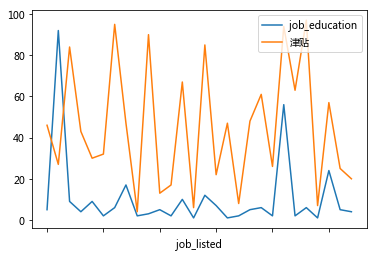

In [262]:
% matplotlib inline
import pandas as pd
import numpy as np

# 争对数据集的属性做简单分析
alg = pd.read_csv('alg.csv')   # 数值类型，尽量字符串

# 分析所有招聘公司的行业状态
re_industry = alg.groupby(by='job_industry').count()
print(len(re_industry))
re_industry['津贴']=np.random.randint(0,100,28)

# re_industry.plot()   # 使用所有数据可视化
re_industry['job_listed'] = re_industry.index
re_industry
re_industry.plot(x='job_listed',y=[1,9])
# re_industry

In [ ]:
# 坐标轴
% matplotlib inline
import pandas as pd
import numpy as np

# 争对数据集的属性做简单分析
alg = pd.read_csv('alg.csv')   # 数值类型，尽量字符串

# 分析所有招聘公司的行业状态
re_industry = alg.groupby(by='job_industry').count()
print(len(re_industry))
re_industry['津贴']=np.random.randint(0,100,28)

# re_industry.plot()   # 使用所有数据可视化
re_industry['job_listed'] = re_industry.index
#  ----------------------


re_industry.plot(x='job_listed',y=[1,9], ax=?)

## bar柱状图

In [242]:
% matplotlib inline


## area区域图

## box箱线图

## 正态分布密度估计图
    - density
    - kde（Kernel Density Estimation）

## hexbin六边形图（2D直方图 + 频率密度图）

## hist直方图

## line曲线图（折线图）

## scatter散点图

## pie饼图